# Erste Datenanalyse Codon-Daten

In [12]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

## Bereinigte Daten einlesen

In [3]:
organisms = ["E.Coli", "Drosophila.Melanogaster", "Homo.Sapiens"]

In [4]:
dfs = {}
for organism in organisms:
    dfs[organism] = pd.read_pickle(f"../data/{organism}/cleanedData.pkl")

In [5]:
dfs[organisms[0]].head()

,id,description,sequence,translation,seguid
0,lcl|U00096.3_cds_AAC73112.1_1,lcl|U00096.3_cds_AAC73112.1_1 [gene=thrL] [loc...,"(A, T, G, A, A, A, C, G, C, A, T, T, A, G, C, ...","(M, K, R, I, S, T, T, I, T, T, T, I, T, I, T, ...",QuAqLUJXXhVXIJRPc+T7iMi0UqE
1,lcl|U00096.3_cds_AAC73113.1_2,lcl|U00096.3_cds_AAC73113.1_2 [gene=thrA] [loc...,"(A, T, G, C, G, A, G, T, G, T, T, G, A, A, G, ...","(M, R, V, L, K, F, G, G, T, S, V, A, N, A, E, ...",/p+3Jdgat4Fq0w2rqqay4xg8Bs4
2,lcl|U00096.3_cds_AAC73114.1_3,lcl|U00096.3_cds_AAC73114.1_3 [gene=thrB] [loc...,"(A, T, G, G, T, T, A, A, A, G, T, T, T, A, T, ...","(M, V, K, V, Y, A, P, A, S, S, A, N, M, S, V, ...",scFdp6oP+pW5HnvUww8MSi93ntM
3,lcl|U00096.3_cds_AAC73115.1_4,lcl|U00096.3_cds_AAC73115.1_4 [gene=thrC] [loc...,"(A, T, G, A, A, A, C, T, C, T, A, C, A, A, T, ...","(M, K, L, Y, N, L, K, D, H, N, E, Q, V, S, F, ...",EkFurFHdk7l6qKQ+5xRiBUhWM9U
5,lcl|U00096.3_cds_AAC73117.1_6,lcl|U00096.3_cds_AAC73117.1_6 [gene=yaaA] [loc...,"(A, T, G, C, T, G, A, T, T, C, T, T, A, T, T, ...","(M, L, I, L, I, S, P, A, K, T, L, D, Y, Q, S, ...",vJJ0yR31YORqwI12U79SgItYU3U


## Datenanalyse

### Länge der Aminosäuresequenzen

In [6]:
def print_df_info(df):
    # Kürzeste Sequenz
    print("Kürzeste Sequenz: ", df['translation'].apply(len).min())

    # Längste Sequenz
    print("Längste Sequenz: ", df['translation'].apply(len).max())

    # Durchschnittliche Länge
    print("Durchschnittliche Länge: ", df['translation'].apply(len).mean())

    # Median
    print("Median: ", df['translation'].apply(len).median())

In [7]:
for organism, df in dfs.items():
    print("---- "+organism+" ----")
    print_df_info(df)

---- E.Coli ----
Kürzeste Sequenz:  9
Längste Sequenz:  2359
Durchschnittliche Länge:  310.336877593361
Median:  274.0
---- Drosophila.Melanogaster ----
Kürzeste Sequenz:  10
Längste Sequenz:  22950
Durchschnittliche Länge:  690.8939743471441
Median:  470.0
---- Homo.Sapiens ----
Kürzeste Sequenz:  13
Längste Sequenz:  35992
Durchschnittliche Länge:  716.8746690009848
Median:  519.0


In [8]:
def show_sequence_length_hist(df, organism):
    sequence_lengths = df['translation'].apply(len)

    plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')

    plt.xlabel('Anzahl der Aminosäuren einer Sequenz')
    plt.ylabel('Häufigkeit')
    plt.title(f'Häufigkeitsverteilung der Aminosäuresequenzlängen beim Organismus {organism}')

    plt.show()

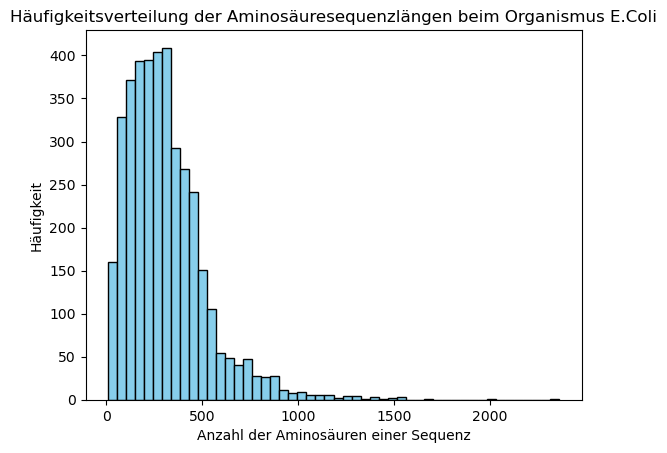

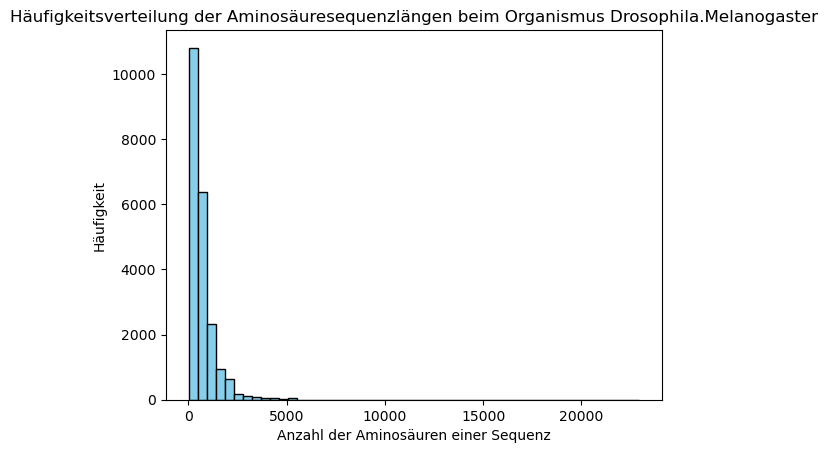

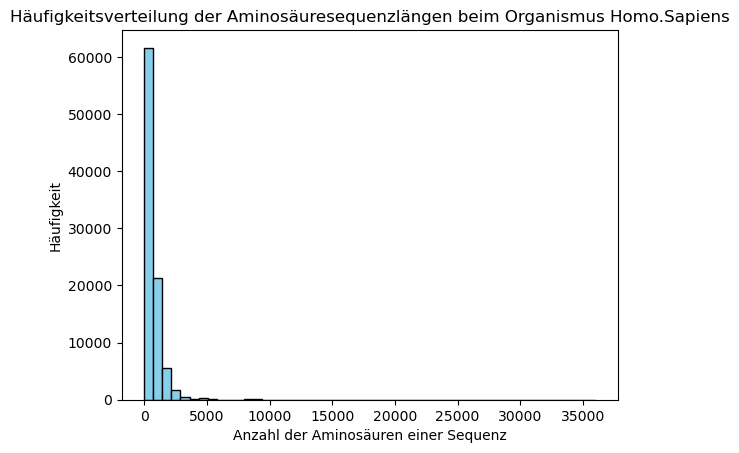

In [9]:
for organism, df in dfs.items():
    show_sequence_length_hist(df, organism)

### Häufigkeit der Codons -> Codon Usage Frequency

In [10]:
def get_codon_frequency_for_row(row):
    codon_frequency = {}

    sequence = row['sequence']
    if len(sequence) % 3 != 0:
        print(f"Sequence length is not a multiple of 3")
        return {}
    codons = [sequence[i:i+3] for i in range(0, len(sequence), 3)]

    for codon in codons:
        if codon in codon_frequency:
            codon_frequency[codon] += 1
        else:
            codon_frequency[codon] = 1

    return codon_frequency

In [11]:
%%time
for organism, df in dfs.items():
    df['codon_frequency'] = df.apply(lambda row: get_codon_frequency_for_row(row), axis=1)

CPU times: total: 3min 34s
Wall time: 3min 35s


In [14]:
with open("../data/dfs_with_codon_frequency.pkl", 'wb') as f:
    pkl.dump(dfs, f)

In [15]:
len(dfs[organisms[2]])

91390

In [34]:
dfs[organisms[0]].head()

,id,description,sequence,translation,seguid,codon_frequency
0,lcl|U00096.3_cds_AAC73112.1_1,lcl|U00096.3_cds_AAC73112.1_1 [gene=thrL] [loc...,"(A, T, G, A, A, A, C, G, C, A, T, T, A, G, C, ...","(M, K, R, I, S, T, T, I, T, T, T, I, T, I, T, ...",QuAqLUJXXhVXIJRPc+T7iMi0UqE,"{('A', 'T', 'G'): 1, ('A', 'A', 'A'): 1, ('C',..."
1,lcl|U00096.3_cds_AAC73113.1_2,lcl|U00096.3_cds_AAC73113.1_2 [gene=thrA] [loc...,"(A, T, G, C, G, A, G, T, G, T, T, G, A, A, G, ...","(M, R, V, L, K, F, G, G, T, S, V, A, N, A, E, ...",/p+3Jdgat4Fq0w2rqqay4xg8Bs4,"{('A', 'T', 'G'): 23, ('C', 'G', 'A'): 3, ('G'..."
2,lcl|U00096.3_cds_AAC73114.1_3,lcl|U00096.3_cds_AAC73114.1_3 [gene=thrB] [loc...,"(A, T, G, G, T, T, A, A, A, G, T, T, T, A, T, ...","(M, V, K, V, Y, A, P, A, S, S, A, N, M, S, V, ...",scFdp6oP+pW5HnvUww8MSi93ntM,"{('A', 'T', 'G'): 10, ('G', 'T', 'T'): 8, ('A'..."
3,lcl|U00096.3_cds_AAC73115.1_4,lcl|U00096.3_cds_AAC73115.1_4 [gene=thrC] [loc...,"(A, T, G, A, A, A, C, T, C, T, A, C, A, A, T, ...","(M, K, L, Y, N, L, K, D, H, N, E, Q, V, S, F, ...",EkFurFHdk7l6qKQ+5xRiBUhWM9U,"{('A', 'T', 'G'): 8, ('A', 'A', 'A'): 17, ('C'..."
5,lcl|U00096.3_cds_AAC73117.1_6,lcl|U00096.3_cds_AAC73117.1_6 [gene=yaaA] [loc...,"(A, T, G, C, T, G, A, T, T, C, T, T, A, T, T, ...","(M, L, I, L, I, S, P, A, K, T, L, D, Y, Q, S, ...",vJJ0yR31YORqwI12U79SgItYU3U,"{('A', 'T', 'G'): 6, ('C', 'T', 'G'): 15, ('A'..."


In [43]:
def get_total_codon_frequency(df):
    total_codon_frequency = {}
    for _, row in df.iterrows():
        codon_frequency = row['codon_frequency']
        for codon, frequency in codon_frequency.items():
            if codon in total_codon_frequency:
                total_codon_frequency[str(codon)] += frequency
            else:
                total_codon_frequency[str(codon)] = frequency
    return total_codon_frequency

In [44]:
codon_frequencys = {}
for organism, df in dfs.items():
    codon_frequencys[organism] = get_total_codon_frequency(df)
    print(len(codon_frequencys[organism].keys()))
    assert len(codon_frequencys[organism].keys()) == 64

64
64


In [45]:
translation_dict = {}
for codon in codon_frequencys[organisms[0]]:
    translation = str(Seq(codon).translate())
    if translation in translation_dict:
        translation_dict[translation].append(codon)
    else:
        translation_dict[translation] = [codon]
translation_dict

{'M': ['ATG'],
 'K': ['AAA', 'AAG'],
 'R': ['CGC', 'CGA', 'CGT', 'AGG', 'CGG', 'AGA'],
 'I': ['ATT', 'ATC', 'ATA'],
 'S': ['AGC', 'TCA', 'TCT', 'AGT', 'TCG', 'TCC'],
 'T': ['ACC', 'ACA', 'ACG', 'ACT'],
 'G': ['GGT', 'GGC', 'GGG', 'GGA'],
 'N': ['AAC', 'AAT'],
 'A': ['GCG', 'GCA', 'GCC', 'GCT'],
 '*': ['TGA', 'TAA', 'TAG'],
 'V': ['GTG', 'GTT', 'GTC', 'GTA'],
 'L': ['TTG', 'CTG', 'CTC', 'TTA', 'CTT', 'CTA'],
 'F': ['TTC', 'TTT'],
 'E': ['GAA', 'GAG'],
 'D': ['GAT', 'GAC'],
 'Q': ['CAG', 'CAA'],
 'P': ['CCC', 'CCG', 'CCT', 'CCA'],
 'H': ['CAC', 'CAT'],
 'C': ['TGC', 'TGT'],
 'Y': ['TAC', 'TAT'],
 'W': ['TGG']}

In [39]:
def calculate_codon_usage_frequency(codon_frequency):
    codon_usage_frequency = {amino_acid: {codon:-1 for codon in translation_dict[amino_acid]} for amino_acid in translation_dict.keys()}
    for amino_acid, codon_dict in codon_usage_frequency.items():
        amino_acid_frequency = 0
        for codon in codon_dict:
            if codon in codon_frequency:
                amino_acid_frequency += codon_frequency[codon]
            else:
                codon_frequency[codon] = 0
        for codon in codon_dict:
            codon_usage_frequency[amino_acid][codon] = round(codon_frequency[codon] / amino_acid_frequency, 2)
    return codon_usage_frequency


In [46]:
codon_usage_frequencys = {}
for organism, df in dfs.items():
   codon_usage_frequencys[organism] = calculate_codon_usage_frequency(codon_frequencys[organism])

In [47]:
codon_usage_frequencys[organisms[0]]

{'M': {'ATG': 1.0},
 'K': {'AAA': 0.77, 'AAG': 0.23},
 'R': {'CGC': 0.4,
  'CGA': 0.06,
  'CGT': 0.39,
  'AGG': 0.02,
  'CGG': 0.09,
  'AGA': 0.04},
 'I': {'ATT': 0.51, 'ATC': 0.42, 'ATA': 0.07},
 'S': {'AGC': 0.28,
  'TCA': 0.12,
  'TCT': 0.15,
  'AGT': 0.15,
  'TCG': 0.15,
  'TCC': 0.15},
 'T': {'ACC': 0.44, 'ACA': 0.13, 'ACG': 0.27, 'ACT': 0.17},
 'G': {'GGT': 0.34, 'GGC': 0.41, 'GGG': 0.15, 'GGA': 0.11},
 'N': {'AAC': 0.55, 'AAT': 0.45},
 'A': {'GCG': 0.36, 'GCA': 0.21, 'GCC': 0.27, 'GCT': 0.16},
 '*': {'TGA': 0.28, 'TAA': 0.65, 'TAG': 0.07},
 'V': {'GTG': 0.37, 'GTT': 0.26, 'GTC': 0.22, 'GTA': 0.16},
 'L': {'TTG': 0.13,
  'CTG': 0.5,
  'CTC': 0.1,
  'TTA': 0.13,
  'CTT': 0.1,
  'CTA': 0.04},
 'F': {'TTC': 0.43, 'TTT': 0.57},
 'E': {'GAA': 0.69, 'GAG': 0.31},
 'D': {'GAT': 0.63, 'GAC': 0.37},
 'Q': {'CAG': 0.65, 'CAA': 0.35},
 'P': {'CCC': 0.12, 'CCG': 0.53, 'CCT': 0.16, 'CCA': 0.19},
 'H': {'CAC': 0.43, 'CAT': 0.57},
 'C': {'TGC': 0.56, 'TGT': 0.44},
 'Y': {'TAC': 0.43, 'TAT': 0.5

In [52]:
print("Condon Usage Frequencies for Leucine (L)\n")
for organism in codon_usage_frequencys:
    print("---- "+organism+" ----")
    print(codon_usage_frequencys[organism]['L'])

Condon Usage Frequencies for Leucine (L)

---- E.Coli ----
{'TTG': 0.13, 'CTG': 0.5, 'CTC': 0.1, 'TTA': 0.13, 'CTT': 0.1, 'CTA': 0.04}
---- Drosophila.Melanogaster ----
{'TTG': 0.18, 'CTG': 0.42, 'CTC': 0.15, 'TTA': 0.05, 'CTT': 0.1, 'CTA': 0.09}


Vergleichswerte von https://www.genscript.com/tools/codon-frequency-table:

*E.Coli:*

{'TTG': 0.13, 'CTG': 0.47, 'CTC': 0.1, 'TTA': 0.14, 'CTT': 0.12, 'CTA': 0.04}

*Drosophila.Melanogaster*

{'TTG': 0.18, 'CTG': 0.43, 'CTC': 0.15, 'TTA': 0.05, 'CTT': 0.1, 'CTA': 0.09}